# Setup

In [1]:
!pip install -Uq fastai2
import fastai2
from fastai2.vision import *  

     |████████████████████████████████| 179 kB 33.7 MB/s 


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 719 kB 37.1 MB/s 
     |████████████████████████████████| 1.3 MB 50.3 MB/s 
     |████████████████████████████████| 441 kB 68.1 MB/s 
     |████████████████████████████████| 5.3 MB 52.4 MB/s 
     |████████████████████████████████| 163 kB 73.8 MB/s 
     |████████████████████████████████| 115 kB 68.0 MB/s 
     |████████████████████████████████| 212 kB 73.5 MB/s 
     |████████████████████████████████| 127 kB 70.9 MB/s 
     |████████████████████████████████| 7.6 MB 60.8 MB/s 
Mounted at /content/gdrive


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Train

In [4]:
# เรียกหารูปจากfolderที่เราเก็บไว้
path = '/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset' # ให้ตั้งเป็นที่ที่เราเก็บdatasetไว้
p_path=Path(path)
fns = get_image_files(path)
fns

(#379) [Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/dog/427ec193-798d-4d0e-9de4-8afd72b7677e.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/dog/898c6bb7-5aa3-44f2-8f5e-3be41bc2bb88.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/dog/d33afa78-42b4-4a7b-bd6f-b391981db612.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/dog/88d1a405-082e-4693-b8a1-1b43fa428258.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/dog/5a4be199-681e-4bdf-acf5-f3feeb7a939c.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/dog/a657c832-0e21-48ae-9be0-e2bb1db4ab98.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/dog/0fb7a568-fdc7-4094-a0d7-57d688a679cd.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/dog/7a23f381-241d-4620-b48f-6caf2a7b4430.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/dog/f24a2dc7-bfd4-478b-9055-0fbdf8836663.jpg'),Pa

สร้างคลาสdataloadersเพื่อเอาไว้เก็บและจัดการข้อมูลให้ตรงกับรูปแบบที่libralyรองรับ

In [5]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [6]:
cactacea = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)) # จะประมวลผลด้วยความชัดเท่าไหร่

In [7]:
failed = verify_images(fns) # ตรวจดูรูปภาพที่มีว่าอ่านได้มั้ย
failed

(#9) [Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/dog/fa1466f7-e86c-4917-b295-6fca4ef8ce50.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/dog/c4c5db36-eebf-46e2-b6be-b98b671af641.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/dog/1405b05c-4569-4c7e-a477-2d2a4cb03578.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/dog/3adc1a5b-9f2e-43a3-90cb-182b34014b53.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/cat/765414ed-4069-4408-9f27-7d10fcdc8d32.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/cat/0c720c96-2813-4a3b-b116-9225195cec0a.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/cat/ed0d81f8-a3b6-401c-8e80-7d1a930714bc.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/cat/9f349dd0-8ab8-4b52-be33-30b513799b56.jpg'),Path('/content/gdrive/MyDrive/CD AIBOOTCAMP/5 - Friday/Dataset/cat/417e8d95-8987-45cb-bf92-628503ac603d.jpg')]

In [8]:
import os

In [9]:
[os.remove(i) for i in failed] # ถ้าอ่านไม่ได้จะใช้libraly os ในการลบรูปภาพดฟล่านั้น

[None, None, None, None, None, None, None, None, None]

In [10]:
dls = cactacea.dataloaders(path) # เอาข้อมูลไปจัดการโดยdataloadersที่เราสร้างขึ้น

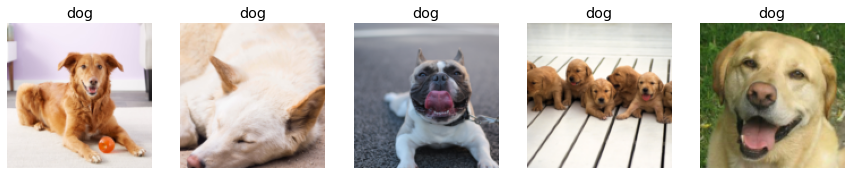

In [11]:
dls.valid.show_batch(max_n=5, nrows=1) # เรียกดูตัวอย่างของรูปภาพ

In [12]:
learn = cnn_learner(dls, resnet34, metrics=accuracy) # เทรนโมเดลโดยใช้โมเดลresnet 
learn.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.097444,0.378117,0.851351,00:25


epoch,train_loss,valid_loss,accuracy,time
0,0.466290,0.258955,0.878378,00:22
1,0.314186,0.175031,0.918919,00:28
2,0.247129,0.164368,0.918919,00:21
3,0.186036,0.187145,0.905405,00:23
4,0.152273,0.201139,0.891892,00:24


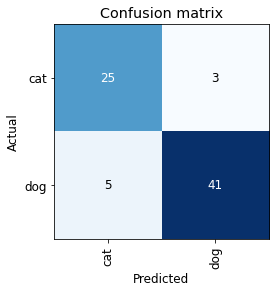

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()  # ดูความแม่นยำ

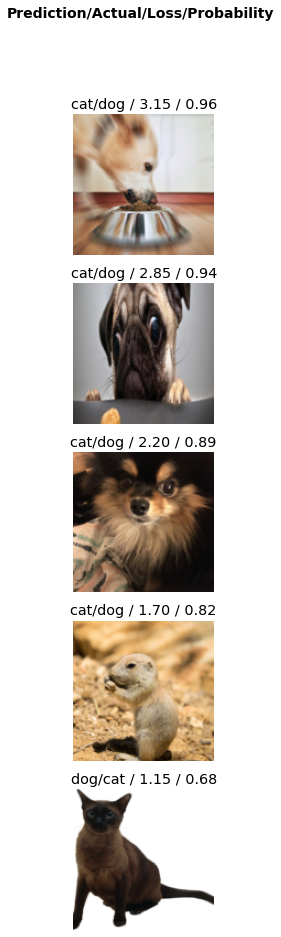

In [14]:
interp.plot_top_losses(5, nrows=5) # เรียกดูรูปภาพที่โมเดลทายผิดโง่ที่สุด

เพื่อให้โมเดลไม่ต้องเรียนรู้ใหม่ทุกครั้งที่จะใช้งาน และเรียกใช้งานง่ายๆ เราจะเซฟโมเดลในรูปแบบของไฟลชื่pickle

In [16]:
learn.export()
path = Path()
path.ls(file_exts='.pkl') 

(#1) [Path('export.pkl')]

# Predict

In [17]:
learn_inf = load_learner(path/'export.pkl') # โหลดโมเดลที่เซฟไว้มาใช้งาน
learn_inf.dls.vocab

['cat', 'dog']

## สร้างฟังก์ชั่นในการใช้ทำนายผลง่ายๆ

In [42]:
btn_upload = widgets.FileUpload() # ลองใส่รูปเข้าไป1รูป
btn_upload

FileUpload(value={}, description='Upload')

In [43]:
img = PILImage.create(btn_upload.data[-1])

In [44]:
pred,pred_idx,probs = learn_inf.predict(img)

In [45]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [46]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [47]:
btn_upload = widgets.FileUpload()

## ลองใช้application ทำนายผล

In [48]:
VBox([widgets.Label('Select your image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])